## Data Analysis Nanodegeree - Udacity 

## Project: Wrangle and Analyze Data - WeRateDogs
### By: Isra Badaha



### Introduction 

This projects aims to practice data wrangling and analysis process as learnt in Wrangling lesson, Data wrangling done as three steps:
1. Gather
2. Assess
3. Clean

And then dealing with results:
1. Save produced cleaned data in new file/s
2. Analyze and visualize data
3. a. Report internally- wrangle_Report: report work was done therough the project
3. b. Report externaly- act_report: to communicate the insights and display visualizations produced from the project 



# Gathering Data

#### For this step I have collected data from three sources:

### Include twitter archive, csv file "twitter_archive_enhanced.csv": 


In [1]:
import pandas as pd 
import requests
import os
import tweepy 
import numpy as np
import matplotlib.pyplot as plt

# Read csv file into twitter_archive_df dataframe
twitter_archive_df = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### Request and download image predictions tsv file from link (Programmaticaly):
 https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv


In [2]:
#download file from url using Response package and save it to current directory
image_prediction_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

with open (os.path.join(image_prediction_url.split('/')[-1]), mode='wb') as file:
        response = requests.get(image_prediction_url)
        file.write(response.content)
        
# Passed seperator as tab character : '\t' since tsv file is tab-seperated 
# Read tsv file into image_predictions_df dataframe 
image_predictions_df = pd.read_csv('image-predictions.tsv', '\t')
image_predictions_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB



##### I chose to skip reading Data from Twitter API, used the ready file from "Accessing Project Data Without a Twitter Account" section


In [3]:
## I used "Accessing Project Data Without a Twitter Account" Section in Twitter API Lesson
# to download tweet_json.txt and uploaded to my project workspace 

# Read data from json file into new dataframe called tweets_df

import json 
import pandas as pd 
from pandas.io.json import json_normalize 


# Read json file line by line as dictionaries to tweets_list then save data in pandas dataframe(tweets_df)
tweets_list =[]

json_file = open('tweet-json.txt', "r")

for line in json_file:
    try:
        tweet = json.loads(line)
        tweets_list.append(tweet)
    except:
        continue
        
json_file.close()

# Create new tweets_df DataFrame
tweets_df = pd.DataFrame()

# Read the required fields for each row and add to tweets dataframe 
tweets_df['tweet_id'] = list(map(lambda tweet: tweet['id'], tweets_list))
tweets_df['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweets_list))
tweets_df['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweets_list))        

tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


# Assessing Data

Assessing done using three ways visually and programmatically for quality and tidiness issues. 


### Visual Assessment
I did this part scrolling our files using google sheets , easier to browse than jupyter notebook.

### Programmatic 
For this part I used python and pandas library functions to assess our three dataframes: <br/>
<br/>*df.info():* Views information about dataframe, like #of columns and entries(rows), columns headers and number of nonnull values for each and datatypes 
<br/>*df.head(n):* Views first n rows of dataframe
<br/>*df.sample(n):* Views sample of n rows of datframe
<br/>*df.tail(n):* Views last n rows of dataframe
<br/>*df[col].value_counts():* Views uniques values for a clommn and count for each value
<br/>*df[col].sort():* Sorts dataframe by one column 
<br/>*df[col].describe():* Views minimum and maximum values and other statistcs numbers summary 


#### Assess twitter_archive_df


In [4]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [5]:
twitter_archive_df.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [6]:
twitter_archive_df.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
743,780459368902959104,NaN,NaN,2016-09-26 17:29:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Bear. Don't worry, he's not a real bea...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/780459368...,11,10,Bear,None,None,None,None
147,863432100342583297,NaN,NaN,2017-05-13 16:33:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Belle. She's never been more pupset. E...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863432100...,12,10,Belle,None,None,None,None
2316,666649482315059201,NaN,NaN,2015-11-17 16:09:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Cool dog. Enjoys couch. Low monotone bark. Ver...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666649482...,4,10,None,None,None,None,None
1113,733109485275860992,NaN,NaN,2016-05-19 01:38:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like father (doggo), like son (pupper). Both 1...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,pupper,None
2348,666055525042405380,NaN,NaN,2015-11-16 00:49:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a Siberian heavily armored polar bear ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666055525...,10,10,a,None,None,None,None
761,778286810187399168,NaN,NaN,2016-09-20 17:36:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stanley. He has too much skin. Isn't h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778286810...,11,10,Stanley,None,None,None,None
134,866686824827068416,NaN,NaN,2017-05-22 16:06:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lili. She can't believe you betrayed h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/866686824...,12,10,Lili,None,None,None,None
2027,671874878652489728,NaN,NaN,2015-12-02 02:13:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mia. She was specifically told not get...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671874878...,10,10,Mia,None,None,None,None
1776,677961670166224897,NaN,NaN,2015-12-18 21:20:32 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Izzy. She's showing off the dance move...,NaN,NaN,NaN,https://vine.co/v/iKuMDuYV0aZ,11,10,Izzy,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None


In [7]:
twitter_archive_df.tail(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2346,666058600524156928,NaN,NaN,2015-11-16 01:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is the Rand Paul of retrievers folks! He'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666058600...,8,10,the,None,None,None,None
2347,666057090499244032,NaN,NaN,2015-11-16 00:55:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",My oh my. This is a rare blond Canadian terrie...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666057090...,9,10,a,None,None,None,None
2348,666055525042405380,NaN,NaN,2015-11-16 00:49:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a Siberian heavily armored polar bear ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666055525...,10,10,a,None,None,None,None
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [8]:
twitter_archive_df['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [9]:
twitter_archive_df['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [10]:
print(twitter_archive_df['doggo'].value_counts(), '\n')
print(twitter_archive_df['floofer'].value_counts(), '\n')
print(twitter_archive_df['pupper'].value_counts(), '\n')
print(twitter_archive_df['puppo'].value_counts())


None     2259
doggo      97
Name: doggo, dtype: int64 

None       2346
floofer      10
Name: floofer, dtype: int64 

None      2099
pupper     257
Name: pupper, dtype: int64 

None     2326
puppo      30
Name: puppo, dtype: int64


In [11]:
twitter_archive_df.sort_values(by = 'timestamp', inplace=True)
twitter_archive_df.timestamp

2355    2015-11-15 22:32:08 +0000
2354    2015-11-15 23:05:30 +0000
2353    2015-11-15 23:21:54 +0000
2352    2015-11-16 00:04:52 +0000
2351    2015-11-16 00:24:50 +0000
2350    2015-11-16 00:30:50 +0000
2349    2015-11-16 00:35:11 +0000
2348    2015-11-16 00:49:46 +0000
2347    2015-11-16 00:55:59 +0000
2346    2015-11-16 01:01:59 +0000
2345    2015-11-16 01:22:45 +0000
2344    2015-11-16 01:52:02 +0000
2343    2015-11-16 01:59:36 +0000
2342    2015-11-16 02:38:37 +0000
2341    2015-11-16 03:22:39 +0000
2340    2015-11-16 03:44:34 +0000
2339    2015-11-16 03:55:04 +0000
2338    2015-11-16 04:02:55 +0000
2337    2015-11-16 14:57:41 +0000
2336    2015-11-16 15:14:19 +0000
2335    2015-11-16 16:11:11 +0000
2334    2015-11-16 16:37:02 +0000
2333    2015-11-16 19:31:45 +0000
2332    2015-11-16 20:01:42 +0000
2331    2015-11-16 20:32:58 +0000
2330    2015-11-16 21:10:36 +0000
2329    2015-11-16 21:54:18 +0000
2328    2015-11-16 23:23:41 +0000
2327    2015-11-17 00:06:54 +0000
2326    2015-1

In [12]:
twitter_archive_df[twitter_archive_df.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [13]:
twitter_archive_df['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [14]:
twitter_archive_df.name.value_counts()

None          745
a              55
Charlie        12
Lucy           11
Oliver         11
Cooper         11
Tucker         10
Lola           10
Penny          10
Bo              9
Winston         9
Sadie           8
the             8
Bailey          7
Daisy           7
Toby            7
Buddy           7
an              7
Scout           6
Jack            6
Koda            6
Milo            6
Bella           6
Stanley         6
Leo             6
Oscar           6
Rusty           6
Jax             6
Dave            6
Larry           5
             ... 
Jessiga         1
Eugene          1
Cedrick         1
Tove            1
Stella          1
Enchilada       1
Alejandro       1
Tassy           1
Pip             1
Mollie          1
Sully           1
Cora            1
Kirk            1
Tug             1
Acro            1
Sonny           1
BeBe            1
Duddles         1
Wesley          1
Apollo          1
Duchess         1
Ole             1
Covach          1
Rilo            1
Kevon     

In [15]:
twitter_archive_df.query('name == "None"')['name'].count()

745

In [16]:
twitter_archive_df[twitter_archive_df.name.str.islower()]['name'].count()

109

### Assess 'image_predictions_df'

In [17]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
image_predictions_df.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [19]:
image_predictions_df.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1132,728387165835677696,https://pbs.twimg.com/media/ChvAQuMWMAAVaKD.jpg,1,collie,0.266414,True,Great_Pyrenees,0.138546,True,keeshond,0.109014,True
1197,740676976021798912,https://pbs.twimg.com/media/Ckdpx5KWsAANF6b.jpg,1,wombat,0.462952,False,Norwegian_elkhound,0.275225,True,Siamese_cat,0.043559,False
1377,763837565564780549,https://pbs.twimg.com/media/CpmyNumW8AAAJGj.jpg,1,malamute,0.375098,True,jean,0.069362,False,keeshond,0.050528,True
310,671542985629241344,https://pbs.twimg.com/media/CVHMyHMWwAALYXs.jpg,1,Shetland_sheepdog,0.980339,True,collie,0.006693,True,papillon,0.006157,True
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
737,687109925361856513,https://pbs.twimg.com/media/CYka1NTWMAAOclP.jpg,2,borzoi,0.883086,True,whippet,0.022934,True,Saluki,0.021606,True
1154,732732193018155009,https://pbs.twimg.com/media/CiswCQhWYAI5-QW.jpg,1,koala,0.162935,False,Staffordshire_bullterrier,0.127969,True,mongoose,0.096421,False
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True
868,697596423848730625,https://pbs.twimg.com/media/Ca5cPrJXIAImHtD.jpg,1,Shetland_sheepdog,0.621668,True,collie,0.366578,True,Pembroke,0.007698,True
1188,739544079319588864,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False


In [20]:
image_predictions_df.tail(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2065,890240255349198849,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
2066,890609185150312448,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
2067,890729181411237888,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
2068,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [21]:
image_predictions_df['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [22]:
print(image_predictions_df['p1'].value_counts(), '\n')
print(image_predictions_df['p2'].value_counts(), '\n')
print(image_predictions_df['p3'].value_counts(), '\n')

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Siberian_husky                20
Staffordshire_bullterrier     20
German_shepherd               20
Cardigan                      19
web_site                      19
teddy                         18
beagle                        18
Eskimo_dog                    18
Shetland_sheepdog             18
Maltese_dog                   18
Lakeland_terrier              17
Rottweiler                    17
Shih-Tzu                      17
Italian_greyhound             16
kuvasz                        16
          

#### Assess tweets_df
2354 entries, 3 columns

In [23]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [24]:
tweets_df.head(10)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


In [25]:
tweets_df.sample(10)

,tweet_id,retweet_count,favorite_count
1594,686286779679375361,1887,4392
1265,709566166965075968,1367,3865
818,770414278348247044,2390,6987
905,757741869644341248,3710,7613
971,750071704093859840,3802,8653
1017,746790600704425984,1806,5345
78,877556246731214848,3994,23258
1164,722613351520608256,1831,5393
1691,681297372102656000,1091,3490
31,886054160059072513,108,0


In [26]:
tweets_df.tail(10)

,tweet_id,retweet_count,favorite_count
2344,666058600524156928,61,115
2345,666057090499244032,146,304
2346,666055525042405380,261,448
2347,666051853826850816,879,1253
2348,666050758794694657,60,136
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132
2353,666020888022790149,532,2535


In [27]:
tweets_df['tweet_id'].value_counts().count()

2354

In [28]:
tweets_df[tweets_df['tweet_id'].duplicated()].count()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64


### Quality Issues
##### *twitter_archive_df*: 2356 entries, 17 columns

- Not Dog rating entries
- Missing dog names and dog types
- Missing expanded_urls values
- Incorrect dog names such as 'a', 'the', and 'None'
- Erronous Data types: timestamp, dog type
- Some column headers are little misleading(not-enough descriptive)
    name, source, dog_types columns
- 23 rows has rating denomenator not equal to 10
- Many rows have huge numerator values >15 
- Source variable is not easily readable (markdown cell)
- *Unnecessary columns: variables for retweet and reply, denomenator*<br/>

##### *image_predictions_df*: 2075 entries, 12 columns
- Compared to twitter_archive_df entries number, there is missing entries -> tweets with no image prediction
- Data entries for P1, P2 and P3 are not in unified format 

##### *tweets_df:*  2354 entries, 3 columns
- No remarkable quality issue here, this is reasonable since we extracted the dataframe as required

### Tidiness Issues
Issues with structure that prevent easy analysis. Untidy data is also known as messy data. 
Tidy data requirements:
1. Each variable forms a column.<br/>
    *Dog type (has four columns): doggo, floofer, pupper, puppo*<br/>
   
2. Each observation forms a row.<br/>
    *Some entries are not about tweets: there raws for retweets and replies*<br/>
    
3. Each type of observational unit forms a table.<br/>
    *One observational type(tweet) has three tables*<br/>
    
<br/>

##### Copy all dataframes to new dataframes before doing any cleaning (Good Backup)

In [29]:
#Copying all three dataframes to files before cleaning 

twitter_archive_df_clean = twitter_archive_df.copy()
image_predictions_df_clean = image_predictions_df.copy()
tweets_df_clean = tweets_df.copy()

# Cleaning Data
Clean detected issues while assessing.

### Cleaning Tidiness Issues
It's better to start cleaning with tidiness issues, because working with quality isssues is easier with tidy data and then we can reAssess if any issues resulted or clarified after tidiness cleaning process. 

#### Define
    1. twitter_archive_df: One variable divied in four columns: (dog stage: doggo, floofer, pupper, puppo)
        Solution: Merge all in one categorical column (dog_stage: 'doggo', 'floofer', 'pupper', 'puppo')<br/>
        
    2. twitter_archive_df: Rows(entries) not about our observational variable(tweet): 
        Solution: Delete rows where retweeted_status_id is not NULL, or in_reply_to_status_id is not NULL<br/>
        
        
    3. All dataframes: Three tables for one observation(tweet)
        Solution: Merge all in one big table< br/>
        
   

In [30]:
#  1. twitter_archive_df: Rows(entries) not about our observational variable(tweet): 
#       Solution: Delete rows where retweeted_status_id is not NULL, or in_reply_to_status_id is not NULL<br/>

#### Code: Drop 181 retweets
twitter_archive_df_clean.drop(twitter_archive_df_clean[twitter_archive_df_clean.retweeted_status_id.notnull()].index, 
                              inplace = True)

# Test
twitter_archive_df_clean.retweeted_status_id.notnull().sum()
        


0

In [31]:
#### Code: Drop 73 replies 
twitter_archive_df_clean.drop(twitter_archive_df_clean[twitter_archive_df_clean.in_reply_to_status_id.notnull()].index, 
                              inplace = True)

# Test
twitter_archive_df_clean.in_reply_to_status_id.notnull().sum()
        

0

In [32]:
# 2. twitter_archive_df: One variable divied in four columns: (dog_type: doggo, floofer, pupper, puppo)
#   Solution: Merge all in one categorical column (dog_type: 'doggo', 'floofer', 'pupper', 'puppo') 
# then remove individual type columns<br/>

twitter_archive_df_clean.query('doggo != "None" | floofer != "None"  | pupper != "None" | puppo != "None"')['tweet_id'].count()


336

In [33]:
# Check for entries with multiple stages
# List of rows indices with multiple stages (doggo with other) dogs 

twitter_archive_df_clean.query('doggo != "None" &(floofer != "None"  | pupper != "None" | puppo != "None")') 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1113,733109485275860992,NaN,NaN,2016-05-19 01:38:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like father (doggo), like son (pupper). Both 1...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,pupper,None
1063,741067306818797568,NaN,NaN,2016-06-10 00:39:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is just downright precious af. 12/10 for ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,None,pupper,None
956,751583847268179968,NaN,NaN,2016-07-09 01:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751583847...,5,10,None,doggo,None,pupper,None
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo,None,pupper,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,None,pupper,None
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,None,pupper,None
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None


In [34]:
doggo_multi_indices = twitter_archive_df_clean.query('doggo != "None" &(floofer != "None"  | pupper != "None" | puppo != "None")').index.values.tolist()
doggo_multi_indices

[1113, 1063, 956, 889, 733, 705, 575, 531, 460, 200, 191]

In [35]:
twitter_archive_df_clean.query('floofer != "None" &( pupper != "None" | puppo != "None")')


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [36]:
twitter_archive_df_clean.query('pupper != "None" & puppo != "None"')


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [37]:
### Code
# Some rows has double type values, for more accurate data I used this to etract type from tweet text
twitter_archive_df_clean['dog_type'] = twitter_archive_df_clean['text'].str.extract('(doggo|pupper|puppo|floofer)', expand=True)

#Test
twitter_archive_df_clean['dog_type'].value_counts()


pupper     240
doggo       80
puppo       29
floofer      4
Name: dog_type, dtype: int64

In [38]:
# Add new value (multistage) for dogs with doggo and other stage inspected above
twitter_archive_df_clean.loc[doggo_multi_indices, 'dog_type'] = "multisatge"

twitter_archive_df_clean['dog_type'].value_counts()

pupper        238
doggo          73
puppo          28
multisatge     11
floofer         4
Name: dog_type, dtype: int64

In [39]:
# Drop individual types column that they are no longer needed
columns = ['doggo','pupper', 'puppo', 'floofer']
twitter_archive_df_clean = twitter_archive_df_clean.drop(columns, axis=1)

#Test 
twitter_archive_df_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 2355 to 0
Data columns (total 14 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
dog_type                      354 non-null object
dtypes: float64(4), int64(3), object(7)
memory usage: 325.7+ KB


#### Tidiness Issue
 tidiness issue #3 
 > All dataframes: Three tables for one observation(tweet)  <br/>
     Solution: Merge all in one big table(dataframe)

In [40]:
# 3. All dataframes: Three tables for one observation(tweet)
#     Solution: Merge all in one big table< br/>

#### code
# Used inner join to take only common ids between three tables and avoid creatig rows with null values 
tweets_merge_df_clean = pd.merge(left=twitter_archive_df_clean, right=tweets_df_clean, on=['tweet_id'], how='inner')
tweets_merge_df_clean = pd.merge(left=tweets_merge_df_clean, right=image_predictions_df_clean, on=['tweet_id'], how='inner')

#### test
tweets_merge_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 27 columns):
tweet_id                      1971 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1971 non-null object
source                        1971 non-null object
text                          1971 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1971 non-null object
rating_numerator              1971 non-null int64
rating_denominator            1971 non-null int64
name                          1971 non-null object
dog_type                      322 non-null object
retweet_count                 1971 non-null int64
favorite_count                1971 non-null int64
jpg_url                       1971 non-null object
img_num                       1971 non-null

### Now I have one tidy dataframe, Remaining cleaning tasks will be done on this dataframe
#### *tweets_merge_df_clean* 

#### Quality Issue
##### Define
##### Unnecessary columns, After deleting related rows in step 1, columns for retweets and replies are no longer required (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)
    Solution: Delete unnecessary columns


In [41]:
# Unnecessary columns, After deleting related rows in step 1, 
# columns for retweets and replies are no longer required (in_reply_to_status_id, in_reply_to_user_id, 
# retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)
#        Solution: Delete unnecessary columns

#### code 
columns = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
twitter_archive_df_clean = twitter_archive_df_clean.drop(columns, axis=1)

#Test 
twitter_archive_df_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 2355 to 0
Data columns (total 9 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
dog_type              354 non-null object
dtypes: int64(3), object(6)
memory usage: 243.8+ KB


### Quality Issues 

### Cleaning missing values Issues:

#### Define
    1. twitter_archive_df: Falsy 'name' values
        Solution: Try to read right name from text column if not avilable then keep None value
        
    2. twitter_archive_df: missing 'expandig_url'
        Solution: Create url using tweet_id
   
        

In [42]:
#1. twitter_archive_df: False 'name'
#        Solution: Try to read right name from text column if not avilable then delete the entry
#
#### Code 
## Recognize wrong names 
tweets_merge_df_clean.name.value_counts()
## name: a = 55
## name: None = 603
## name: the = 8
## name: an = 6

None          524
a              55
Charlie        11
Cooper         10
Lucy           10
Oliver         10
Penny           9
Tucker          9
Winston         8
Sadie           8
Daisy           7
the             7
Toby            7
Lola            7
Stanley         6
Jax             6
an              6
Koda            6
Bella           6
Bo              6
Milo            5
Scout           5
Bailey          5
Rusty           5
Oscar           5
Leo             5
Buddy           5
Chester         5
Louis           5
Dave            5
             ... 
Schnozz         1
Furzey          1
incredibly      1
Dale            1
Wesley          1
Pip             1
Nida            1
Duddles         1
Beebop          1
Aubie           1
Mac             1
Bert            1
Darrel          1
Bubba           1
Tayzie          1
Wiggles         1
Arlen           1
Striker         1
Scott           1
Spencer         1
by              1
Mollie          1
Sully           1
Cora            1
Major     

In [43]:
# Fix name with None value 
tweets_merge_df_clean.query('name == "None"')['tweet_id'].count()


524

In [44]:
tweets_merge_df_clean[tweets_merge_df_clean.name.str.islower()]['name'].value_counts()

a               55
the              7
an               6
very             4
one              4
quite            3
just             3
getting          2
my               1
infuriating      1
space            1
his              1
such             1
officially       1
unacceptable     1
this             1
not              1
actually         1
by               1
all              1
light            1
incredibly       1
Name: name, dtype: int64

In [45]:
###Define
## If we delete these rows a lot of data will missed,

## Code : Clean lower case (wrong) names all to None value
# Replace all lower case names(false) with "None" value 
tweets_merge_df_clean.loc[tweets_merge_df_clean.name.str.islower(), 'name'] = "None"

# Test
tweets_merge_df_clean.query('name == "None"')['tweet_id'].count()

622

In [46]:
#2. twitter_archive_df: missing 'expanded_urls'
#        Solution: Create url using tweet_id
#### Code

def create_expanding_url(row):
    # Don't do anything if expanded_urls is not null
    if pd.notnull(row['expanded_urls']):
        return row
    else:
        # use row's tweet_id
        tweet_id = row['tweet_id']
        row['expanded_urls'] = 'https://twitter.com/dog_rates/status/{}'.format(tweet_id)
        return row


# Apply our function to all rows 
tweets_merge_df_clean = tweets_merge_df_clean.apply(create_expanding_url, axis=1)

# Test
tweets_merge_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 27 columns):
tweet_id                      1971 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1971 non-null object
source                        1971 non-null object
text                          1971 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null float64
expanded_urls                 1971 non-null object
rating_numerator              1971 non-null int64
rating_denominator            1971 non-null int64
name                          1971 non-null object
dog_type                      322 non-null object
retweet_count                 1971 non-null int64
favorite_count                1971 non-null int64
jpg_url                       1971 non-null object
img_num                       1971 non-nul

### Quality Issues

#### Define
    - Erronous Data types: timestamp, dog_type 
        Solution: Change timestamp datatype to datetime
     
    - 23 rows has rating denomenator not equal to 10
        Solution: 
            1. Drop rows with denomininator not equal to 10
            2. Then drop rating_denominator column since all values are equal, it's no more required
        
    - Source variabe unreadable (markdown cell)
        Solution: extract content text from markdown cell 
        
    - Some column headers are not enough descreptive
        Solution: chnge column headers to something that's more suitable
        
    - P1 , P2 and P3 columns entries are not well formated 
        Solution: Capitalize all and remove underscores
        

In [47]:
# Erronous Data types: timestamp <br/>
#   Solution: Change timestamp datatype to datetime <br/>
 
#### Code 
tweets_merge_df_clean['timestamp'] = pd.to_datetime(tweets_merge_df_clean['timestamp'])
#### Test
tweets_merge_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 27 columns):
tweet_id                      1971 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1971 non-null datetime64[ns]
source                        1971 non-null object
text                          1971 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null float64
expanded_urls                 1971 non-null object
rating_numerator              1971 non-null int64
rating_denominator            1971 non-null int64
name                          1971 non-null object
dog_type                      322 non-null object
retweet_count                 1971 non-null int64
favorite_count                1971 non-null int64
jpg_url                       1971 non-null object
img_num                       1971

In [48]:
# 23 rows has rating denominator not equal to 10
#   Solution: 1- Drop rows with denominator not equal to 10

#### Code 
tweets_merge_df_clean.drop(tweets_merge_df_clean[tweets_merge_df_clean.rating_denominator != 10].index, 
                              inplace = True)

#### Test
tweets_merge_df_clean.rating_denominator.value_counts()


10    1954
Name: rating_denominator, dtype: int64

In [49]:
# 2- Drop rating_denomenator column
del tweets_merge_df_clean['rating_denominator']

# Test
tweets_merge_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1954 entries, 0 to 1970
Data columns (total 26 columns):
tweet_id                      1954 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1954 non-null datetime64[ns]
source                        1954 non-null object
text                          1954 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null float64
expanded_urls                 1954 non-null object
rating_numerator              1954 non-null int64
name                          1954 non-null object
dog_type                      316 non-null object
retweet_count                 1954 non-null int64
favorite_count                1954 non-null int64
jpg_url                       1954 non-null object
img_num                       1954 non-null int64
p1                            1954

In [50]:
# source variabe unreadable (markdown cell) <br/>
#   Solution: extract content text from markdown cell<br/>
            
#### Code
tweets_merge_df_clean['source'].value_counts()


<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1915
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [51]:
## Code
tweets_merge_df_clean[['source']] = tweets_merge_df_clean[['source']].replace(
    ['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 
     '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 
     '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'], 
    ['Twitter for iPhone','Twitter Web Client' , 'TweetDeck'])
    
#Test
tweets_merge_df_clean['source'].value_counts()

Twitter for iPhone    1915
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

In [52]:
# Some column headers are not enough descreptive
#   Solution: change column headers to something that's more suitable

#Print column headers to view before clean
list(tweets_merge_df_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'name',
 'dog_type',
 'retweet_count',
 'favorite_count',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

In [53]:
# Rename source to tweet_source, name to dog_name, text to tweet_text
tweets_merge_df_clean.rename(columns={'name': 'dog_name', 
                                      'source': 'tweet_source',
                                      'text': 'tweet_text'}, 
                             inplace=True)

#Test 
list(tweets_merge_df_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'tweet_source',
 'tweet_text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'dog_name',
 'dog_type',
 'retweet_count',
 'favorite_count',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

In [54]:
# P1 , P2 and P3 columns entries are not well formated 
#    Solution: Capitalize all and remove underscores

#### Code:
#Remove all underscores and replace with spaces
tweets_merge_df_clean['p1'] = tweets_merge_df_clean['p1'].str.replace('_', ' ')
tweets_merge_df_clean['p2'] = tweets_merge_df_clean['p2'].str.replace('_', ' ')
tweets_merge_df_clean['p3'] = tweets_merge_df_clean['p3'].str.replace('_', ' ')

# Set each word's first letter to capital using title fumction
tweets_merge_df_clean['p1'] = tweets_merge_df_clean['p1'].str.title()
tweets_merge_df_clean['p2'] = tweets_merge_df_clean['p2'].str.title()
tweets_merge_df_clean['p3'] = tweets_merge_df_clean['p3'].str.title()

# Test
print(tweets_merge_df_clean['p1'].value_counts().head(10), '\n')
print(tweets_merge_df_clean['p2'].value_counts().head(10), '\n')
print(tweets_merge_df_clean['p3'].value_counts().head(10))

Golden Retriever      134
Labrador Retriever     91
Pembroke               88
Chihuahua              78
Pug                    54
Chow                   41
Samoyed                40
Pomeranian             38
Toy Poodle             37
Malamute               29
Name: p1, dtype: int64 

Labrador Retriever          95
Golden Retriever            80
Cardigan                    73
Chihuahua                   41
Chesapeake Bay Retriever    40
French Bulldog              39
Pomeranian                  38
Toy Poodle                  35
Siberian Husky              33
Miniature Poodle            32
Name: p2, dtype: int64 

Labrador Retriever           74
Chihuahua                    57
Golden Retriever             44
Eskimo Dog                   35
Kelpie                       33
Kuvasz                       31
Staffordshire Bullterrier    30
Cocker Spaniel               29
Beagle                       29
Toy Poodle                   29
Name: p3, dtype: int64


## Storing, Analyzing, and Visualizing Data

#### Store the clean DataFrame(s) in a CSV file with the main one named twitter_archive_master.csv.


In [55]:
tweets_merge_df_clean.to_csv('twitter_archive_master.csv')

#### Analyze and visualize your wrangled data

Motivation: Exploring how dog type is related with other variables, like:
1. Average Rating
2. Ratings count
3. Retweets count
4. Favorite count 

####  groupby dog type 

In [56]:
tweets_merge_df_clean.groupby('dog_type')['rating_numerator'].mean()

dog_type
doggo         11.746032
floofer       12.666667
multisatge    11.200000
pupper        10.619718
puppo         12.111111
Name: rating_numerator, dtype: float64

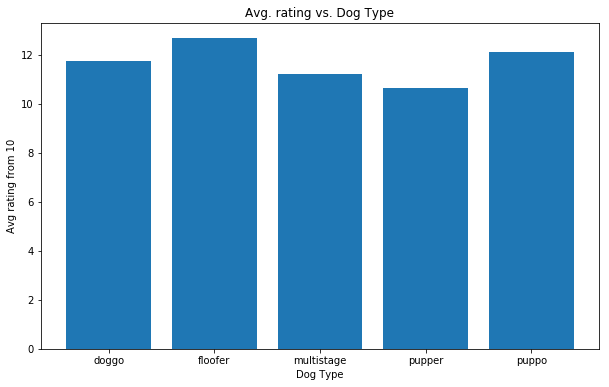

In [65]:
## Plot dog_type vs. avg rating
dog_type = ['doggo', 'floofer', 'multistage', 'pupper', 'puppo']
avg_rating = [11.746, 12.667, 11.2, 10.62, 12.111]

fig,ax = plt.subplots(figsize = (10, 6))
ax.bar(dog_type, avg_rating, width = 0.8)
ax.set_ylabel('Avg rating from 10')
ax.set_xlabel('Dog Type')
plt.title("Avg. rating vs. Dog Type")
plt.show()

In [58]:
tweets_merge_df_clean.dog_type.value_counts()

pupper        213
doggo          63
puppo          27
multisatge     10
floofer         3
Name: dog_type, dtype: int64

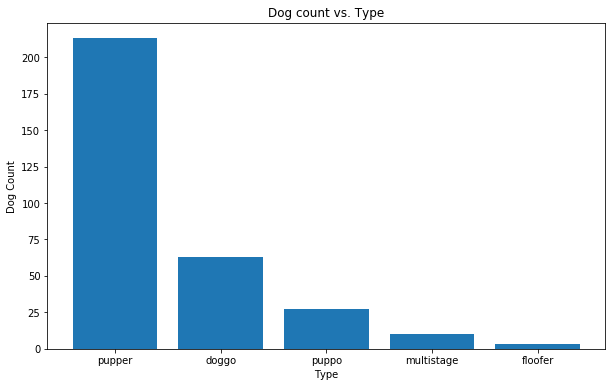

In [64]:

dog_type = ['pupper', 'doggo', 'puppo','multistage', 'floofer']
dog_counts = [213, 63, 27, 10, 3]

fig,ax = plt.subplots(figsize = (10, 6))
ax.bar(dog_type, dog_counts)
ax.set_ylabel('Dog Count')
ax.set_xlabel('Type')
plt.title("Dog count vs. Type")
plt.show()

In [60]:
tweets_merge_df_clean.retweet_count.describe()

count     1954.000000
mean      2785.858751
std       4705.353047
min         16.000000
25%        624.750000
50%       1366.500000
75%       3243.000000
max      79515.000000
Name: retweet_count, dtype: float64

In [61]:
tweets_merge_df_clean.favorite_count.describe()

count      1954.000000
mean       8971.329069
std       12302.225779
min          81.000000
25%        1960.500000
50%        4148.000000
75%       11414.750000
max      132810.000000
Name: favorite_count, dtype: float64

In [62]:
tweets_merge_df_clean.groupby('dog_type')['retweet_count'].mean()

dog_type
doggo         6216.047619
floofer       8529.000000
multisatge    5780.700000
pupper        2350.291080
puppo         6317.185185
Name: retweet_count, dtype: float64

In [63]:
tweets_merge_df_clean.groupby('dog_type')['favorite_count'].mean()

dog_type
doggo         17260.476190
floofer       22929.000000
multisatge    17077.200000
pupper         7200.751174
puppo         21829.851852
Name: favorite_count, dtype: float64

### Insights

1. Most common dog type is pupper then doggo then puppo then the least common is floofer type
2. Highest rated type is floofer vs. the lowest rated is pupper 
3. Mostly retweets are for floofer
4. Mostly favorites for floofer also 
> Noted that Floofer type is the most liked but most rare 

5. Mean retweet_count is 2785 and mean favorite_count is 8971
